# Análisis de Datos de Ventas

## · Importar los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar los datos
df = pd.read_csv('./Datos/American Things - Base de Datos.csv', encoding='latin-1')

# LIMPIEZA DE DATOS

## Datos con formato incorrecto y datos ausentes
### Formatea las columnas "Costo", "Ventas" y "Resenia" a formato numérico, reemplazando los datos incorrectos por valores nulos(Nan) y posteriormente se reemplazan los valores nulos por la Media de cada columna

In [2]:
# Convierte los str formato numero y los errores en NaN
df['Costo'] = pd.to_numeric(df['Costo'], errors='coerce')
df['Ventas'] = pd.to_numeric(df['Ventas'], errors='coerce')
df['Resenia'] = pd.to_numeric(df['Resenia'], errors='coerce')

# Reemplaza los valores nulos(NaN) por la media de la columna
df['Costo'] = df['Costo'].fillna(df['Costo'].mean())
df['Ventas'] = df['Ventas'].fillna(df['Ventas'].mean())
df['Resenia'] = df['Resenia'].fillna(df['Resenia'].mean())

## Datos duplicados
### Borra el o los registros duplicados en la columna "Factura"

In [3]:
# Eliminar duplicados considerando solo la columna 'Factura'
df = df.drop_duplicates(subset=['Factura'])

## Datos erroneos
### Se modifican los valores erroneos en las columnas

In [4]:
# Convierte los valores a formato FECHA y los errores en NaN
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Reemplaza los valores nulos(NaN) por el último valor no nulo
df['Fecha'] = df['Fecha'].ffill()


for i in df.index:

    # Controla si el valor de las reseñas está entre 1 y 10, de lo contrario se reemplaza el valor por la media de la columna 'Resenia'
    if df.loc[i, 'Resenia'] < 1 or df.loc[i, 'Resenia'] > 10:
        df.loc[i, 'Resenia'] = df['Resenia'].mean()

    # Controla si el valor la columna "Tipo" es "Normal" o "Member", de lo contrario se reemplaza el valor por "Normal"
    if df.loc[i, "Tipo"] not in ("Normal","Member"):
        df.loc[i, "Tipo"] = "Normal"

    # Controla si el valor la columna "Costo" y "Ventas" es 0 < valor < 5000, de lo contrario se reemplaza por la mediana de cada columna
    if df.loc[i, "Costo"] <= 0 or df.loc[i, "Costo"] > 5000:
        df.loc[i, "Costo"] = df["Costo"].median()

    if df.loc[i, "Ventas"] <= 0 or df.loc[i, "Ventas"] > 5000:
        df.loc[i, "Ventas"] = df["Ventas"].median()

    try:
        # Controla si el valor la columna "Sucursal" está en las opciones "A","B", "C", de lo contrario elimina el registro completo
        if df.loc[i, "Sucursal"] not in ("A","B", "C"):
            df = df.drop(i)

        if df.loc[i, "Ciudad"] not in ("Chicago","Houston", "Nueva York"):
            df = df.drop(i)
    except:
        print("El registro ya no existe")
   

El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe
El registro ya no existe


## · Imprimir los primeros diez registros

In [5]:
print(df.head(10))

        Factura Sucursal      Ciudad    Tipo  Genero               Categoria  \
0   750-67-8428        A  Nueva York  Member  Female       Health and beauty   
1   226-31-3081        C     Houston  Normal  Female  Electronic accessories   
2   631-41-3108        A  Nueva York  Normal    Male      Home and lifestyle   
3   123-19-1176        A  Nueva York  Member    Male       Health and beauty   
5   699-14-3026        C     Houston  Normal    Male  Electronic accessories   
6   355-53-5943        A  Nueva York  Member  Female  Electronic accessories   
8   665-32-9167        A  Nueva York  Member  Female       Health and beauty   
9   692-92-5582        B     Chicago  Member  Female                  Female   
10  351-62-0822        B     Chicago  Member  Female     Fashion accessories   
11  529-56-3974        B     Chicago  Member    Male  Electronic accessories   

     Costo  Ventas      Fecha   Hora Metodo de Pago   Resenia  
0   522.83  548.97 2019-01-05  13:08        Ewallet  6.

## ·        Describir el dataset
### Se comenta la descripción total del DataFrame y se describe solo las variables que necesitamos

In [6]:
#print(df.describe(include='all'))

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("\nVariables numéricas:")
print(df[['Costo', 'Ventas', 'Resenia']].describe())

print("\nVariables categóricas:")
print(df[['Sucursal', 'Ciudad', 'Tipo', 'Genero', 'Categoria', 'Metodo de Pago']].describe(include='object'))

# Análisis de simetría
print("\n=== SIMETRÍA DE VARIABLES NUMÉRICAS ===")
numeric_cols = ['Costo', 'Ventas', 'Resenia']
for col in numeric_cols:
    skewness = df[col].skew()  # Intenta calcular asimetría en una columna de texto
    print(f"{col}:")
    print(f"  Asimetría: {skewness:.2f}")
    if abs(skewness) < 0.5:
        print("  Distribución aproximadamente simétrica")
    elif 0.5 <= abs(skewness) < 1:
        print("  Distribución moderadamente asimétrica")
    else:
        print("  Distribución altamente asimétrica")


=== ESTADÍSTICAS DESCRIPTIVAS ===

Variables numéricas:
            Costo      Ventas     Resenia
count  352.000000  352.000000  352.000000
mean   311.945455  321.293338    7.002760
std    220.300954  226.377510    1.716135
min      2.000000   13.170000    4.000000
25%    143.940000  146.795000    5.600000
50%    277.340000  272.660000    6.996456
75%    434.835000  461.550000    8.425000
max    993.000000  944.620000   10.000000

Variables categóricas:
       Sucursal      Ciudad    Tipo Genero           Categoria Metodo de Pago
count       352         352     352    349                 338            349
unique        3           3       2     10                  22              6
top           A  Nueva York  Normal   Male  Home and lifestyle           Cash
freq        128         128     191    175                  60            136

=== SIMETRÍA DE VARIABLES NUMÉRICAS ===
Costo:
  Asimetría: 0.95
  Distribución moderadamente asimétrica
Ventas:
  Asimetría: 0.85
  Distribución mode

## ·        Análisis de columnas numéricas

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    print(f"Análisis de la columna numérica: {col}")
    print(f"Valores válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Media: {round(df[col].mean(), 2)}")
    print(f"Mediana: {round(df[col].median(), 2)}")
    print(f"Desviación estándar: {round(df[col].std(), 2)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna numérica: Costo
Valores válidos sobre el total: 352 / 352
Media: 311.95
Mediana: 277.34
Desviación estándar: 220.3
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna numérica: Ventas
Valores válidos sobre el total: 352 / 352
Media: 321.29
Mediana: 272.66
Desviación estándar: 226.38
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna numérica: Resenia
Valores válidos sobre el total: 352 / 352
Media: 7.0
Mediana: 7.0
Desviación estándar: 1.72
Valores ausentes: 0
Valores mal registrados o erróneos: 0



## ·        Análisis de columnas categóricas

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Análisis de la columna categórica: {col}")
    print(df[col].value_counts())
    print(f"Registros válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna categórica: Factura
Factura
750-67-8428    1
808-65-0703    1
566-19-5475    1
633-91-1052    1
126-54-1082    1
              ..
239-10-7476    1
488-25-4221    1
338-65-2210    1
casa           1
831-64-0259    1
Name: count, Length: 351, dtype: int64
Registros válidos sobre el total: 351 / 352
Valores ausentes: 1
Valores mal registrados o erróneos: 2

Análisis de la columna categórica: Sucursal
Sucursal
A    128
C    118
B    106
Name: count, dtype: int64
Registros válidos sobre el total: 352 / 352
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna categórica: Ciudad
Ciudad
Nueva York    128
Houston       118
Chicago       106
Name: count, dtype: int64
Registros válidos sobre el total: 352 / 352
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna categórica: Tipo
Tipo
Normal    191
Member    161
Name: count, dtype: int64
Registros válidos sobre el total: 352 / 352
Valores ausentes: 0
Valores mal regi

## ·        Análisis de otras variables

In [9]:
other_cols = df.columns.difference(numeric_cols).difference(categorical_cols)

for col in other_cols:
    print(f"Análisis de la columna: {col}")
    print(f"Valores válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna: Fecha
Valores válidos sobre el total: 352 / 352
Valores ausentes: 0
Valores mal registrados o erróneos: 0



# GRÁFICOS 

## Gráfico de cantidad de Ventas por Ciudad

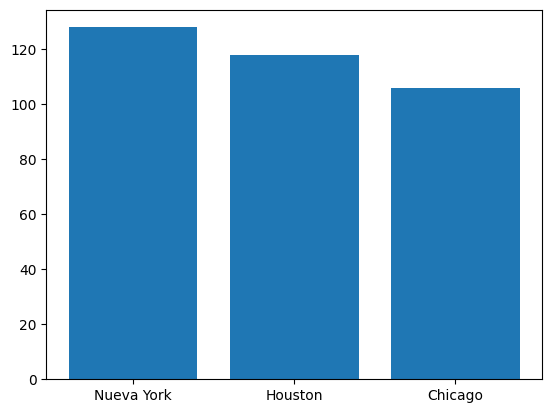

In [16]:

vta_ciudad = pd.DataFrame(df["Ciudad"].value_counts())


plt.bar(vta_ciudad.index, vta_ciudad["count"])
plt.show()


## Gráfico de porcentajes de clientes que son miembros y de los que no son miembros.
### Tienen el propósito de analizar la cantidad de clientes que se registran en la base de datos y fomentar la registración de dichos clientes para obtener mas metadatos y ofrecerles ofertas personalizadas.

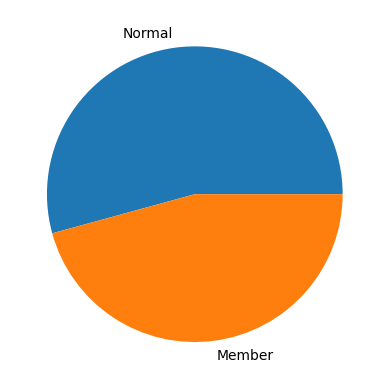

In [15]:
# Genera un grafico de torta para representar porcentajes de tipos de clientes
plt.pie(df['Tipo'].value_counts(), labels = df['Tipo'].value_counts().index)
plt.show()

## Gráfico de las reseñas de las sucursales (Calificación)

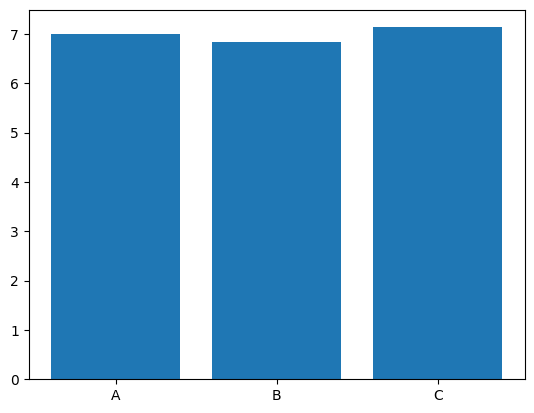

In [12]:
reseniasSucursal = pd.DataFrame(df['Resenia'].groupby(df['Sucursal']).mean())

plt.bar(reseniasSucursal.index, reseniasSucursal["Resenia"])
plt.show()

## Gráfico de Ventas por categoría